#토마토 잎 분석을 통해 토마토의 상태를 알려주는 딥러닝 모델 구현

1. 데이터 선정이유

약재를 재배함에 있어서 좋은 약재를 유통시키기 위해서는 1차적으로 좋은 약재를 생산해야합니다.  

한의학에서 토마토는 번가(番茄), 서홍(西紅)시, 번이자(番李子)로 부르기도 하는 토마토의 잎을 보고 토마토의 상태를 알려주는 딥러닝 모델을 만들고 싶어 해당 프로젝트를 진행하게 되었습니다.

- 데이터

kaggle의 Tomato leaf disease detection

https://www.kaggle.com/datasets/kaustubhb999/tomatoleaf

- 데이터 설명

Tomatomosaicvirus - 토마토 모자이크 바이러스

Target_Spot- 표적 반점

Bacterial_spot - 세균 반점  

TomatoYellowLeafCurlVirus - 토마토황화잎말림바이러스

Late_blight - 역병
-->아일랜드 감자 기근을 일으킨 병원균

Leaf_Mold - 잎 곰팡이

Early_blight- 토마토 초기 역병

Spidermites Two-spottedspider_mite - 점박이진드기

Tomato___healthy

Septorialeafspot - Septorial 잎 반점

In [1]:
import numpy as np
import pandas as pd
import os
from tensorflow import keras
from keras import optimizers
optimizer=keras.optimizers.RMSprop(learning_rate=0.01)

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
path= '/content/drive/MyDrive/archive/tomato'
train_path = os.path.join(path, "train")
print(os.listdir(train_path))

['Tomato___Tomato_Yellow_Leaf_Curl_Virus', 'Tomato___Early_blight', 'Tomato___Leaf_Mold', 'Tomato___Spider_mites Two-spotted_spider_mite', 'Tomato___Target_Spot', 'Tomato___Septoria_leaf_spot', 'Tomato___Late_blight', 'Tomato___Bacterial_spot', 'Tomato___Tomato_mosaic_virus', 'Tomato___healthy']


In [4]:
test_path = os.path.join(path, "val")
print(os.listdir(test_path))

['Tomato___Bacterial_spot', 'Tomato___Early_blight', 'Tomato___Tomato_mosaic_virus', 'Tomato___Tomato_Yellow_Leaf_Curl_Virus', 'Tomato___healthy', 'Tomato___Late_blight', 'Tomato___Target_Spot', 'Tomato___Spider_mites Two-spotted_spider_mite', 'Tomato___Septoria_leaf_spot', 'Tomato___Leaf_Mold']


In [5]:
from glob import glob
folders = glob("/content/drive/MyDrive/archive/tomato/train/*")
folders

['/content/drive/MyDrive/archive/tomato/train/Tomato___Tomato_Yellow_Leaf_Curl_Virus',
 '/content/drive/MyDrive/archive/tomato/train/Tomato___Early_blight',
 '/content/drive/MyDrive/archive/tomato/train/Tomato___Leaf_Mold',
 '/content/drive/MyDrive/archive/tomato/train/Tomato___Spider_mites Two-spotted_spider_mite',
 '/content/drive/MyDrive/archive/tomato/train/Tomato___Target_Spot',
 '/content/drive/MyDrive/archive/tomato/train/Tomato___Septoria_leaf_spot',
 '/content/drive/MyDrive/archive/tomato/train/Tomato___Late_blight',
 '/content/drive/MyDrive/archive/tomato/train/Tomato___Bacterial_spot',
 '/content/drive/MyDrive/archive/tomato/train/Tomato___Tomato_mosaic_virus',
 '/content/drive/MyDrive/archive/tomato/train/Tomato___healthy']

In [6]:
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential

In [7]:
SIZE = [128,128]

In [8]:
#import VGG19

from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.vgg19 import VGG19

In [9]:
vgg19 = VGG19(input_shape=SIZE + [3], weights="imagenet", include_top=False)

In [10]:
for layer in vgg19.layers:
    layer.trainable = False

In [11]:
x = Flatten()(vgg19.output)

In [12]:
prediction = Dense(len(folders), activation="softmax")(x)

model_vgg19 = Model(inputs=vgg19.input, outputs=prediction)

In [13]:
model_vgg19.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 128, 128, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 128, 128, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 128, 128, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 64, 64, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 64, 64, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 64, 64, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 32, 32, 128)       0     

In [14]:
from tensorflow.keras import optimizers
from keras.optimizers import RMSprop

In [15]:
model_vgg19.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(lr=1e-4),
              metrics=['acc'])

/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/rmsprop.py:143: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


In [16]:
train_datagen_vg19 = ImageDataGenerator(rescale=1./255)

test_datagen_vg19 = ImageDataGenerator(rescale=1./255)

In [17]:
trainning_set_vg19 = train_datagen_vg19.flow_from_directory(train_path,
                                                 target_size=(128, 128),
                                                 batch_size=32,
                                                 class_mode="categorical",
                                                 shuffle=True)

Found 10000 images belonging to 10 classes.


In [18]:
testing_set_vg19 = test_datagen_vg19.flow_from_directory(test_path,
                                                 target_size=(128, 128),
                                                 batch_size=32,
                                                 class_mode="categorical",
                                                 shuffle=False)

Found 1000 images belonging to 10 classes.


In [19]:
r= model_vgg19.fit(trainning_set_vg19,validation_data=testing_set_vg19 ,validation_batch_size=64,epochs=10)

Epoch 1/10
313/313 [==============================] - 41s 117ms/step - loss: 1.5816 - acc: 0.5475 - val_loss: 1.1912 - val_acc: 0.6580
Epoch 2/10
313/313 [==============================] - 33s 105ms/step - loss: 1.0016 - acc: 0.7114 - val_loss: 0.9737 - val_acc: 0.7040
Epoch 3/10
313/313 [==============================] - 31s 100ms/step - loss: 0.8191 - acc: 0.7571 - val_loss: 0.8860 - val_acc: 0.7150
Epoch 4/10
313/313 [==============================] - 32s 101ms/step - loss: 0.7188 - acc: 0.7855 - val_loss: 0.8084 - val_acc: 0.7520
Epoch 5/10
313/313 [==============================] - 31s 99ms/step - loss: 0.6524 - acc: 0.8018 - val_loss: 0.7555 - val_acc: 0.7580
Epoch 6/10
313/313 [==============================] - 32s 101ms/step - loss: 0.6029 - acc: 0.8165 - val_loss: 0.7291 - val_acc: 0.7620
Epoch 7/10
313/313 [==============================] - 31s 100ms/step - loss: 0.5609 - acc: 0.8326 - val_loss: 0.6962 - val_acc: 0.7640
Epoch 8/10
313/313 [==============================] - 31

In [20]:
score_train = model_vgg19.evaluate(trainning_set_vg19, verbose=2)
accuracy_train = 100*score_train[1]
print('Train accuracy = %.4f%% ' % accuracy_train)

score_val = model_vgg19.evaluate(testing_set_vg19 , verbose=2)
accuracy_val = 100*score_val[1]
print('Test accuracy = %.4f%% ' % accuracy_val)

313/313 - 27s - loss: 0.4584 - acc: 0.8604 - 27s/epoch - 87ms/step
Train accuracy = 86.0400% 
32/32 - 3s - loss: 0.6621 - acc: 0.7720 - 3s/epoch - 86ms/step
Test accuracy = 77.2000% 


In [21]:
import matplotlib.pyplot as plt

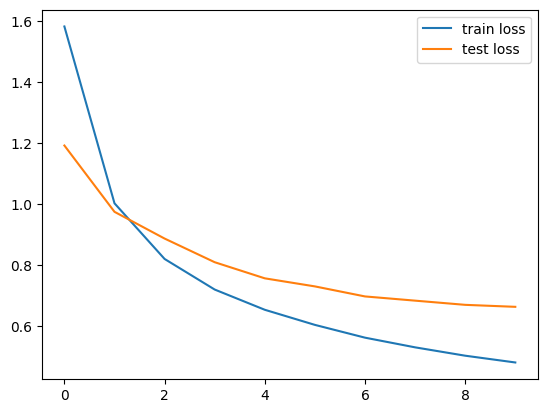

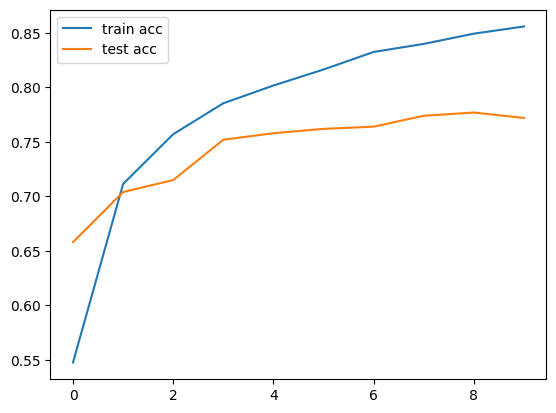

<Figure size 640x480 with 0 Axes>

In [22]:
# plot the loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='test loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(r.history['acc'], label='train acc')
plt.plot(r.history['val_acc'], label='test acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [23]:
y_pred = model_vgg19.predict(testing_set_vg19)

32/32 [==============================] - 3s 91ms/step


In [24]:
y_pred

array([[9.4129562e-01, 2.7788678e-02, 3.0777887e-03, ..., 1.9803639e-03,
        3.5980315e-06, 7.9304875e-05],
       [9.6845597e-01, 2.1626607e-02, 6.0482654e-03, ..., 2.3902221e-04,
        4.7899493e-07, 2.4510427e-06],
       [9.6634966e-01, 2.4279216e-02, 4.1565965e-03, ..., 1.9314341e-04,
        1.1069883e-06, 1.6051483e-05],
       ...,
       [9.3803890e-03, 2.3437636e-01, 2.5333551e-01, ..., 3.2352234e-04,
        7.6826545e-04, 2.7325160e-03],
       [2.2591790e-03, 1.9318928e-01, 3.5067302e-01, ..., 5.3508533e-04,
        4.2187002e-02, 2.2919817e-01],
       [1.4419787e-01, 4.6587680e-02, 1.9221030e-01, ..., 1.4440961e-01,
        3.6193859e-02, 1.8146850e-01]], dtype=float32)

In [25]:
y_pred = np.argmax(y_pred, axis=1)
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 4, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 7, 0, 0, 0, 0, 0, 0, 0, 7, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 5, 4, 1, 5, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 4, 1, 1, 1, 2, 0, 1, 1, 1, 1, 1,
       4, 6, 2, 2, 2, 1, 2, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 2, 8, 1, 2, 1,
       1, 1, 2, 1, 1, 1, 1, 1, 2, 2, 2, 1, 2, 1, 1, 1, 2, 6, 1, 2, 2, 4,
       1, 1, 0, 2, 3, 4, 1, 1, 4, 1, 1, 2, 2, 1, 2, 1, 1, 2, 0, 1, 1, 1,
       2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 1, 4, 2, 1, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 3, 2, 1, 2, 1, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 1, 2, 0, 2, 2, 1, 2, 1, 2, 2, 2, 0, 2, 2, 2, 2, 3,
       2, 2, 4, 2, 2, 2, 1, 1, 2, 4, 2, 2, 2, 2, 2, 2, 2, 6, 2, 2, 2, 2,
       2, 2, 1, 2, 2, 2, 2, 2, 2, 1, 2, 2, 0, 4, 3,

In [26]:
from collections import Counter

In [27]:
cnt = Counter(y_pred)
cnt

Counter({0: 113,
         2: 123,
         4: 96,
         7: 98,
         1: 88,
         5: 93,
         6: 94,
         3: 75,
         8: 124,
         9: 96})

In [35]:
model_vgg19.save("vgg_19tl.model")

In [36]:
import cv2
import tensorflow as tf
def prepare(filepath):
    img_array = cv2.imread(filepath, cv2.IMREAD_COLOR)
    img_array = img_array / 255
    new_array = cv2.resize(img_array, (128, 128))
    return new_array.reshape(-1, 128, 128, 3)

model = tf.keras.models.load_model("vgg_19tl.model")

In [32]:
class_dict = trainning_set_vg19.class_indices
class_dict

{'Tomato___Bacterial_spot': 0,
 'Tomato___Early_blight': 1,
 'Tomato___Late_blight': 2,
 'Tomato___Leaf_Mold': 3,
 'Tomato___Septoria_leaf_spot': 4,
 'Tomato___Spider_mites Two-spotted_spider_mite': 5,
 'Tomato___Target_Spot': 6,
 'Tomato___Tomato_Yellow_Leaf_Curl_Virus': 7,
 'Tomato___Tomato_mosaic_virus': 8,
 'Tomato___healthy': 9}

In [37]:
def prediction_cls(prediction):
    for key, clss in class_dict.items():
        if np.argmax(prediction) == clss:
            return key

In [38]:
prediction = model.predict([prepare('/content/drive/MyDrive/archive/tomato/val/Tomato___Tomato_mosaic_virus/0befa341-0db3-49f4-b4fc-beeb05854bff___PSU_CG 2338.JPG')])
prediction_cls(prediction)

1/1 [==============================] - 1s 690ms/step


'Tomato___Tomato_mosaic_virus'

In [39]:
prediction = model.predict([prepare('/content/drive/MyDrive/archive/tomato/val/Tomato___healthy/000bf685-b305-408b-91f4-37030f8e62db___GH_HL Leaf 308.1.JPG')])
prediction_cls(prediction)

1/1 [==============================] - 0s 19ms/step


'Tomato___healthy'

32/32 [==============================] - 3s 89ms/step


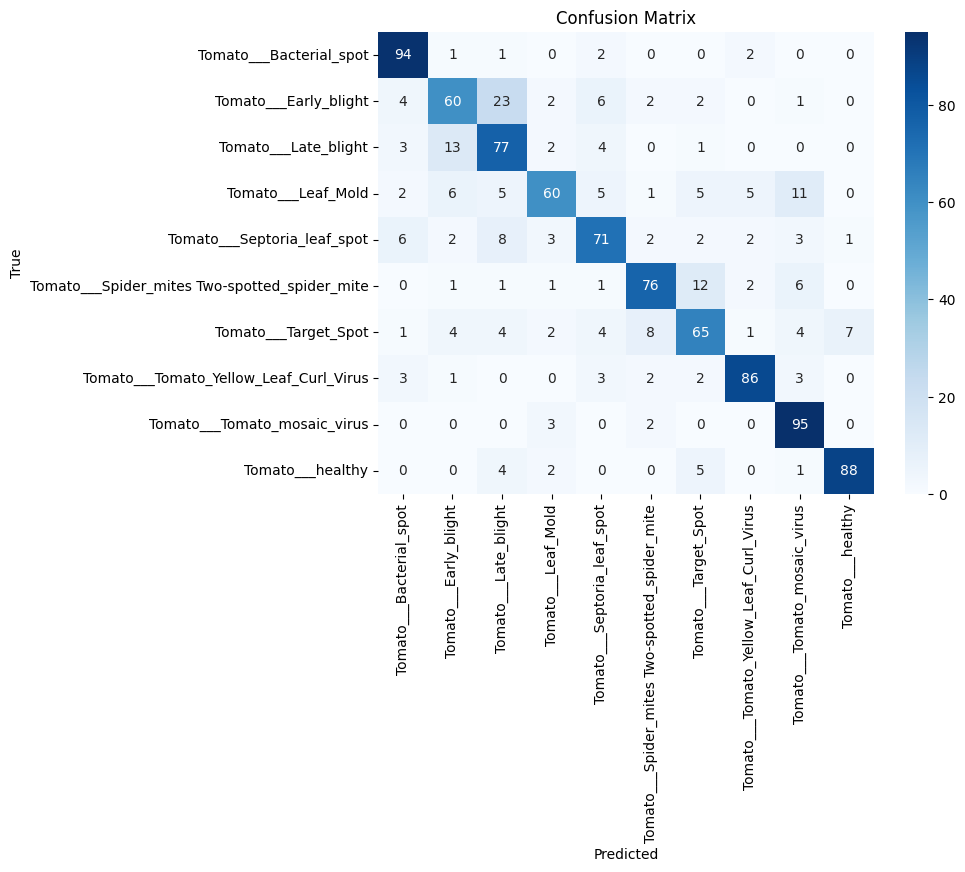

Classification Report:
                                               precision    recall  f1-score   support

                      Tomato___Bacterial_spot       0.83      0.94      0.88       100
                        Tomato___Early_blight       0.68      0.60      0.64       100
                         Tomato___Late_blight       0.63      0.77      0.69       100
                           Tomato___Leaf_Mold       0.80      0.60      0.69       100
                  Tomato___Septoria_leaf_spot       0.74      0.71      0.72       100
Tomato___Spider_mites Two-spotted_spider_mite       0.82      0.76      0.79       100
                         Tomato___Target_Spot       0.69      0.65      0.67       100
       Tomato___Tomato_Yellow_Leaf_Curl_Virus       0.88      0.86      0.87       100
                 Tomato___Tomato_mosaic_virus       0.77      0.95      0.85       100
                             Tomato___healthy       0.92      0.88      0.90       100

                  

In [47]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report

# 모델의 예측 레이블 얻기
y_pred = model_vgg19.predict(testing_set_vg19)

# one-hot 인코딩을 원래의 레이블 형태로 변환
y_pred_labels = np.argmax(y_pred, axis=1)
y_true_labels = testing_set_vg19.classes

# 혼동 행렬 계산
conf_matrix = confusion_matrix(y_true_labels, y_pred_labels)

# 클래스 레이블 (class_labels) 얻기
class_labels = list(testing_set_vg19.class_indices.keys())

# 시각화 설정
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.show()

# 분류 리포트 출력 (정확도, 정밀도, 재현율 등의 평가 지표)
report = classification_report(y_true_labels, y_pred_labels, target_names=class_labels)
print("Classification Report:")
print(report)